<a href="https://colab.research.google.com/github/raamiiChu/NCCU_110-2_Applications-of-mathematics-softwares-homework/blob/main/0418_%E4%BD%9C%E6%A5%AD/%E6%A8%A1%E5%9E%8B%E8%A3%BD%E4%BD%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=#FF3030>更改處皆以紅色字體標示在對應程式碼上方</font>

### 更改概要

1. 匯入新模組
    - SDG：優化器(學習方法)
    - shutil：用於移除資料夾
    - Counter：用於快速檢視資料
    - train_test_split：用於資料分割

1. 將八哥照片的樣本數新增至 3090 （[詳細方法](https://colab.research.google.com/drive/1yUw47Wm6PeG6HQFb7bCXpdN6cEOi780B?usp=sharing)）
1. 刪除照片資料夾
1. 使用 Counter 檢視資料
1. 分割 測試資料 以及 訓練資料
1. 優化器修改為 "SGD"
1. learning rate 修改為 0.005
1. batch_size 修改為 20
1. epochs 修改為 30
1. 使用 測試資料 來觀看準確率

### 0. 匯入模組

<font color=#FF3030>匯入 SGD</font>

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

<font color=#FF3030>匯入 Counter, shutil</font>

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import zipfile  # 用於解壓縮檔案
import shutil  # 用於移除資料夾

<font color=#FF3030>匯入 Counter, train_test_split</font>

In [ ]:
# 用於快速計算陣列中各個元素的數量
from collections import Counter

# 用於資料分割（測試資料 與 訓練資料）
from sklearn.model_selection import train_test_split

### 1. 讀入八哥資料圖檔

In [ ]:
# 連接雲端
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks/數學軟體應用/作業/0418 作業/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/數學軟體應用/作業/0418 作業


In [ ]:
# 解壓縮
local_zip = "myna.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("")
zip_ref.close()

##### 程式碼運行結果

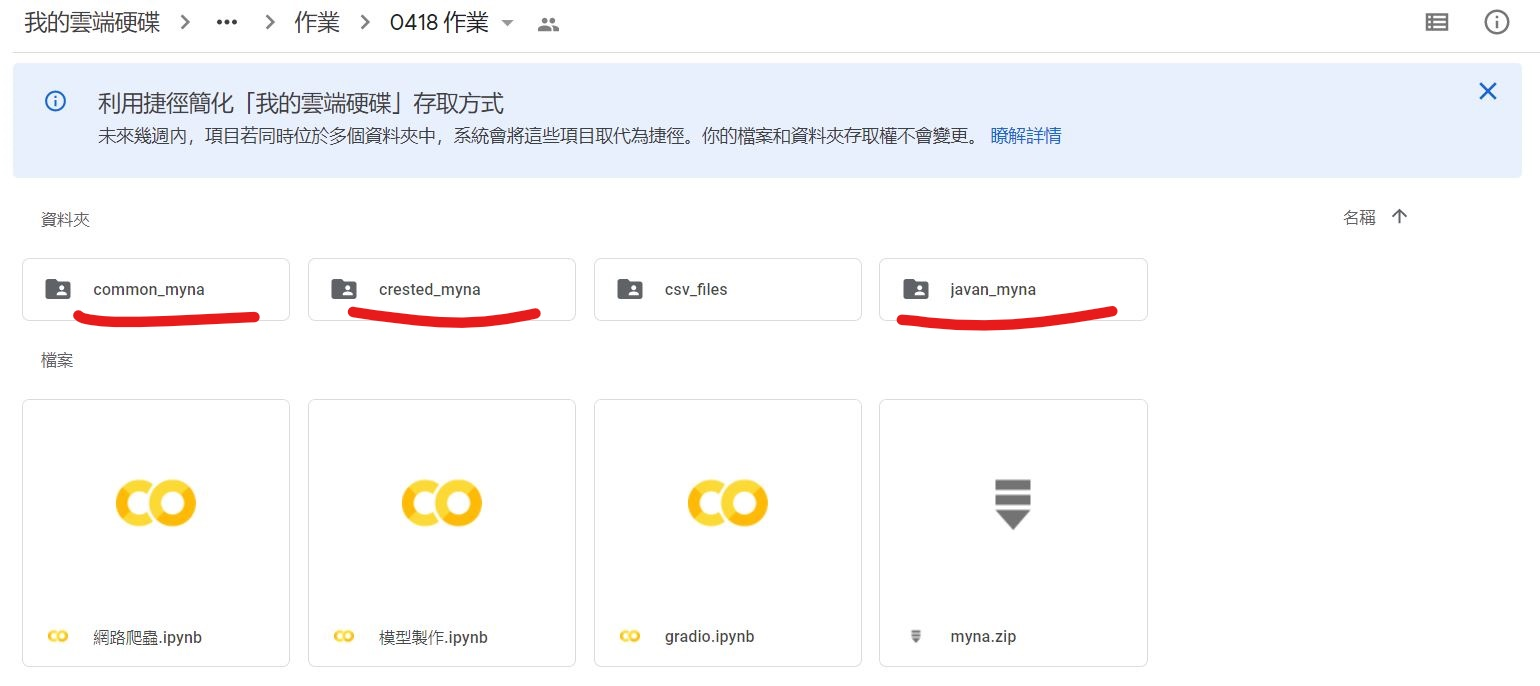

### 2. 把八哥照片轉成 測試資料 與 訓練資料


<font color=#FF3030>將八哥照片的樣本數新增至 3090 </font>

詳細照片來源及相關程式碼[請點此查看](https://colab.research.google.com/drive/1yUw47Wm6PeG6HQFb7bCXpdN6cEOi780B?usp=sharing)
（理論上大多數的生物照片都能夠透過此方式獲取）

如果好奇有那些照片的話，可以將 myna.zip 下載下來後於自己的電腦上檢視

資料總數：3090 \
資料分布： \

- 土八哥　： 349 \
- 白尾八哥：1411 \
- 家八哥　：1330 \

**<font color= #285ab8>因為土八哥的資料數量過少的緣故，因此選擇將其複製成 4 份，使資料量變為 349*4 = 1396 </font>** \

補充：土八哥照片稀少的原因：
[連結1](https://sites.google.com/a/birds-tesri.twbbs.org/bbs-taiwan/ba-ge-bian-shi-xiao-pie-bu-bbs-taiwan-bao-hu-ni-zhi)、
[連結2](https://www.storm.mg/lifestyle/1017797)

In [ ]:
myna_folders = ['crested_myna', 'javan_myna', 'common_myna']

In [ ]:
data = []
target = []

for i in range(3):
    thedir = myna_folders[i]
    myna_fnames = os.listdir(thedir)
    for myna in myna_fnames:
        img = load_img(f"{thedir}/{myna}", target_size = (256,256))
        x = np.array(img)
        data.append(x)
        target.append(i)
    
    # 將土八哥的資料複製成 4 份
    if i == 0:
        data *= 4
        target *= 4

In [ ]:
data = np.array(data)

#### <font color=#FF3030>刪除照片資料夾（否則雲端空間會被塞爆）</font>

In [ ]:
for folder in myna_folders:
    shutil.rmtree(folder, ignore_errors=True)

##### 程式碼運行結果

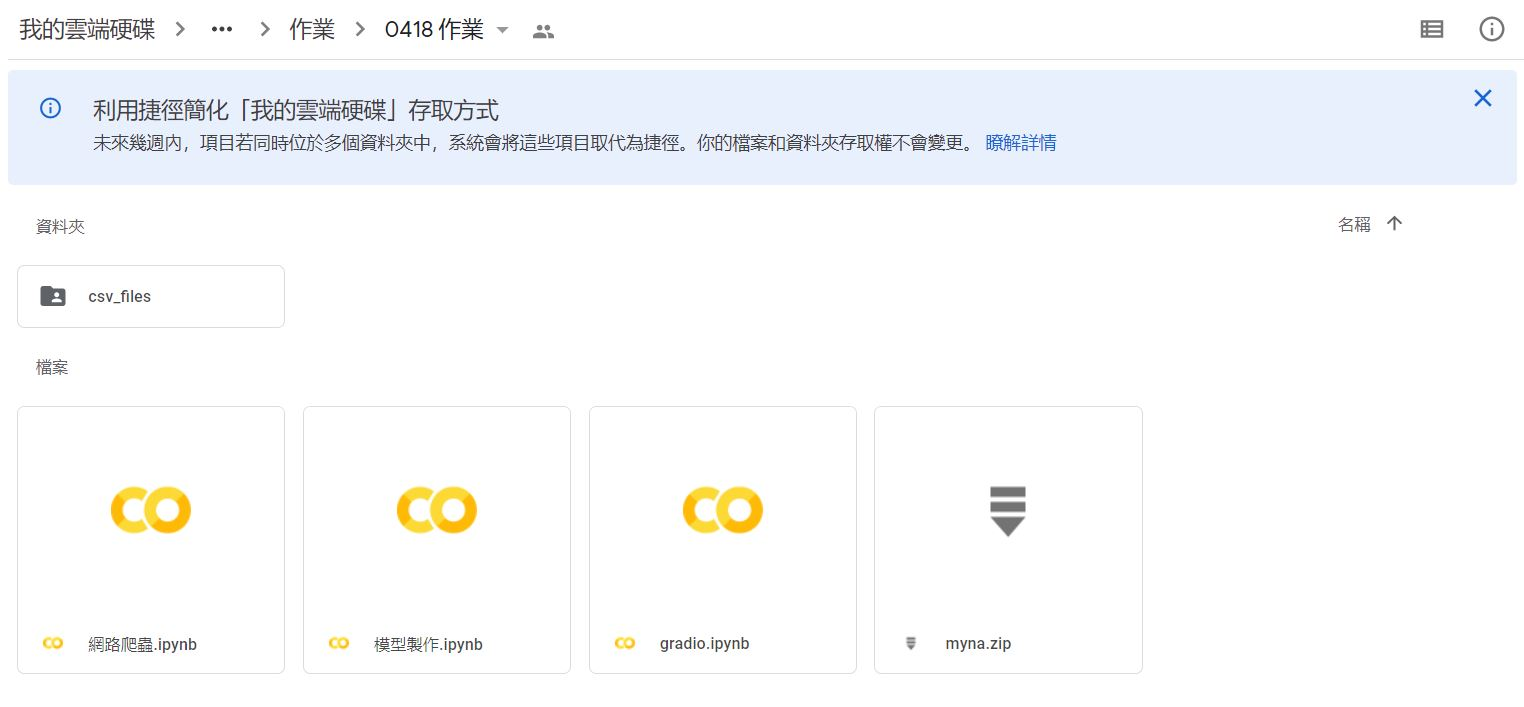

#### 檢視資料

In [ ]:
# 資料總數
len(data)

4137

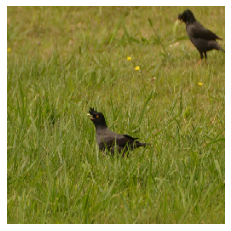

In [ ]:
# 檢視照片
n=349
plt.axis('off')
plt.imshow(data[n]);

<font color=#FF3030>使用 Counter 檢視資料</font>

In [ ]:
# 查看各個元素的數量
# 0:土八哥, 1:白尾八哥, 2:家八哥
print(Counter(target))

Counter({1: 1411, 0: 1396, 2: 1330})


#### <font color=#FF3030>分割 測試資料 以及 訓練資料</font>

In [ ]:
# 將全部資料分割成 測試資料 以及 訓練資料，比例為 7:3
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 10)

In [ ]:
# 檢查用
print(x_train.shape, x_test.shape, len(y_train), len(y_test), sep=" | ")

(2895, 256, 256, 3) | (1242, 256, 256, 3) | 2895 | 1242


In [ ]:
# 檢查用
# 0:土八哥, 1:白尾八哥, 2:家八哥
print(Counter(y_train), Counter(y_test), sep="\n")

Counter({1: 1014, 0: 957, 2: 924})
Counter({0: 439, 2: 406, 1: 397})


#### 預處理

In [ ]:
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


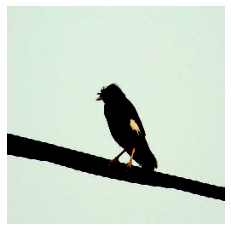

In [ ]:
n = 1000
plt.axis('off')
plt.imshow(x_train[n]);

#### one-hot enconding

In [ ]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [ ]:
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

### 3. 用 ResNet50 打造我們的神經網路



ResNet50 是 2015 ImageNet 的冠軍, 我們用第二版來試試。原本 ImageNet 是做了 1,000 個類別的圖形辨識。我們想直接用來辨識八哥, 就是把最後一層 (通常就 1,000 個輸出的 dense 層) 砍掉 (`include_top=False`), 然後換我們的就好。

再來我們可以把每個 filter 的結果做個大總合, 例如算每個 filter 計分板的總平均 (global avg pooling), 這本來該我們自己做, 但是 `tf.Keras` 是善良無比的幫我們做好。只要下個參數 `pooling="avg"`)。

In [ ]:
resnet = ResNet50V2(include_top=False, pooling="avg")

我們是遷移式學習, 原本 ResNet 的部份我們當然沒有重新訓練的意思。於是就設這邊不需要訓練。

In [ ]:
resnet.trainable = False

再來就是正式打造我們遷移學習版的函數學習機! 可以發現我們只是加入了最後一層...

In [ ]:
model = Sequential()

In [ ]:
model.add(resnet)

In [ ]:
model.add(Dense(3, activation='softmax'))  # 3個結果

#### 組裝我們的函數學習機


*   <font color=#FF3030>優化器修改為 SGD</font>
*   <font color=#FF3030>learning rate 修改為 0.005</font>

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = SGD(learning_rate=0.005),
              metrics = ['accuracy'])

#### 欣賞我們的神經網路

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense (Dense)               (None, 3)                 6147      
                                                                 
Total params: 23,570,947
Trainable params: 6,147
Non-trainable params: 23,564,800
_________________________________________________________________


我們可以發現原來有超過兩千萬個參數, 經我們偷來, 不是, 借來以後, 只有 6,147 個參數要調。

### 4. 訓練 fit



- <font color=#FF3030>batch_size 修改為 20</font>
- <font color=#FF3030>epochs 修改為 30</font>

In [ ]:
model.fit(x_train, y_train, batch_size=20, epochs=30)

Epoch 1/30
145/145 [==============================] - 40s 187ms/step - loss: 0.9960 - accuracy: 0.5396
Epoch 2/30
145/145 [==============================] - 26s 179ms/step - loss: 0.7964 - accuracy: 0.6473
Epoch 3/30
145/145 [==============================] - 26s 178ms/step - loss: 0.7286 - accuracy: 0.6853
Epoch 4/30
145/145 [==============================] - 26s 178ms/step - loss: 0.6762 - accuracy: 0.7064
Epoch 5/30
145/145 [==============================] - 26s 177ms/step - loss: 0.6368 - accuracy: 0.7313
Epoch 6/30
145/145 [==============================] - 26s 179ms/step - loss: 0.6136 - accuracy: 0.7485
Epoch 7/30
145/145 [==============================] - 26s 178ms/step - loss: 0.5969 - accuracy: 0.7668
Epoch 8/30
145/145 [==============================] - 26s 178ms/step - loss: 0.5737 - accuracy: 0.7641
Epoch 9/30
145/145 [==============================] - 26s 178ms/step - loss: 0.5544 - accuracy: 0.7772
Epoch 10/30
145/145 [==============================] - 26s 178ms/step - l

### 5. 預測



In [ ]:
y_predict = np.argmax(model.predict(x_train), -1)

<font color=#FF3030>好奇的話比較一下正確答案。
（True 表示正確數量 ；False 表示錯誤數量）</font>

In [ ]:
y_train = np.argmax(y_train, -1)
Counter(y_train == y_predict)

Counter({False: 331, True: 2564})

<font color=#FF3030>使用測試資料來觀看準確率</font>

In [ ]:
model.evaluate(x_test, y_test, batch_size=1)

1242/1242 [==============================] - 32s 24ms/step - loss: 0.6717 - accuracy: 0.7311


[0.6716731786727905, 0.7310789227485657]

### 6. 把 model 存起來

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks/數學軟體應用/作業/0418 作業/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/數學軟體應用/作業/0418 作業


In [ ]:
model.save('myna_model')

INFO:tensorflow:Assets written to: myna_model/assets


##### 程式碼運行結果

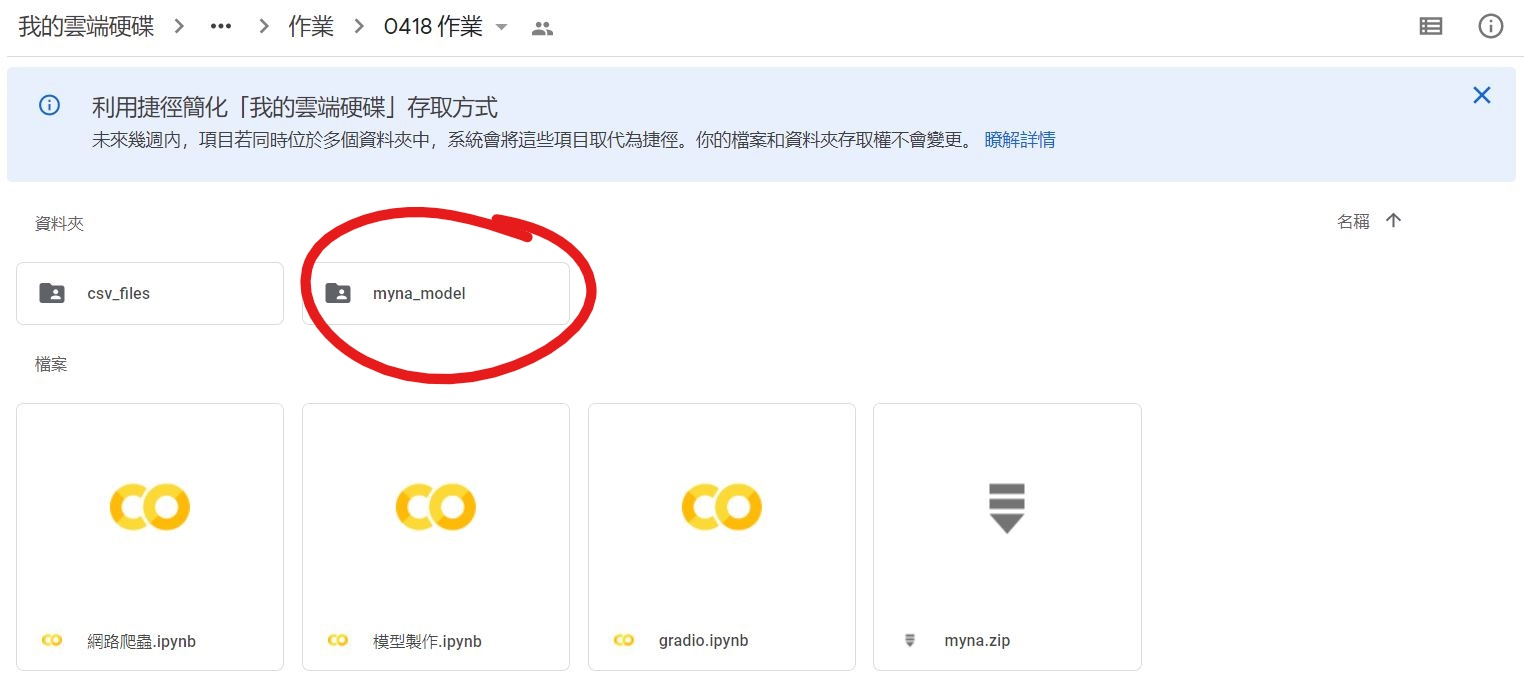